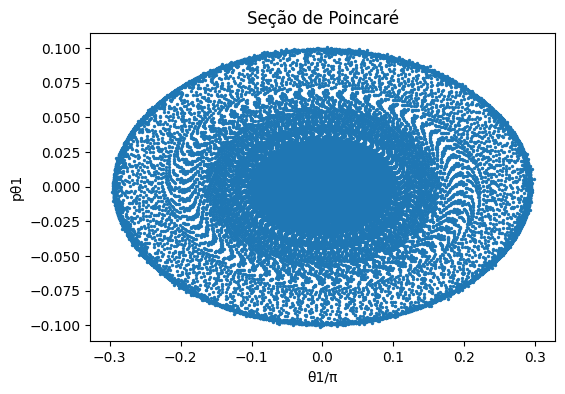

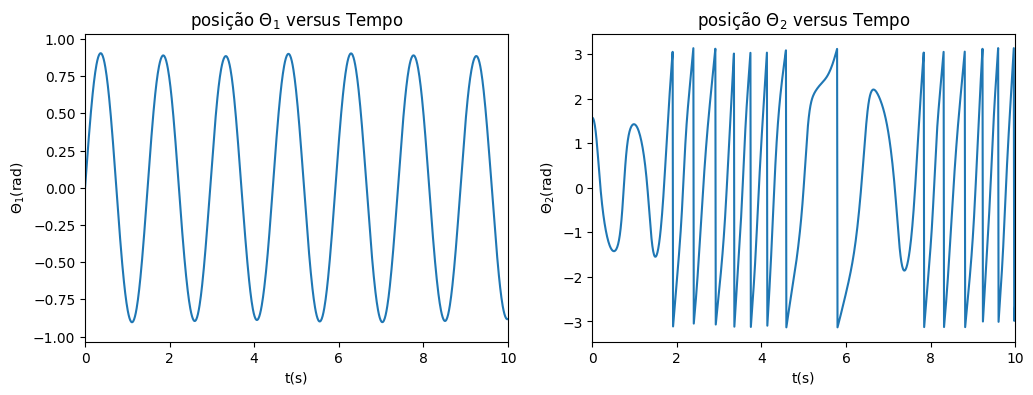

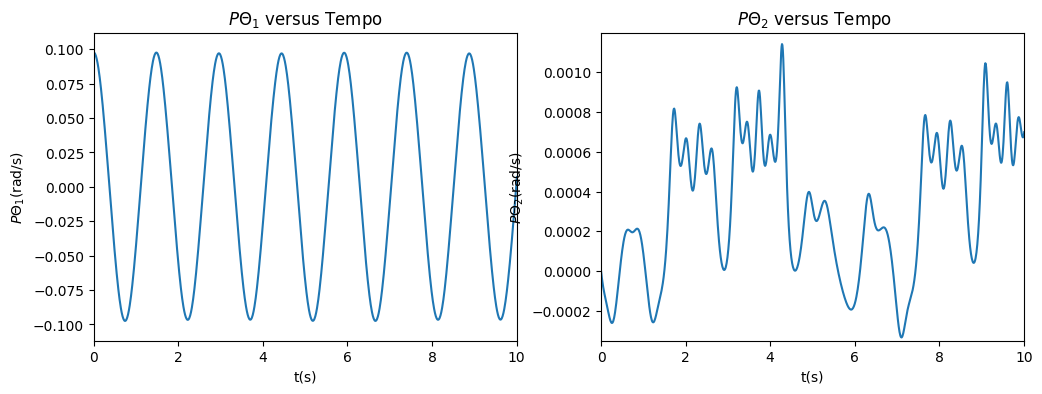

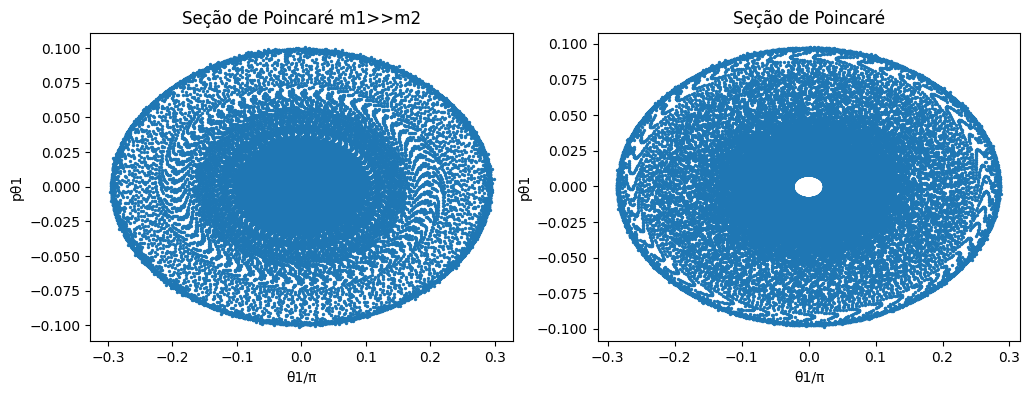

Text(0.5, 1.0, ' $P \\Theta_2$ versus Tempo')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


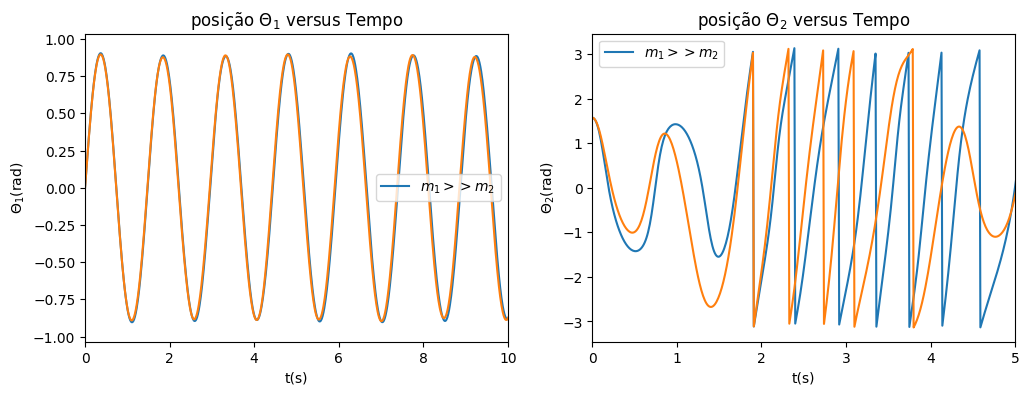

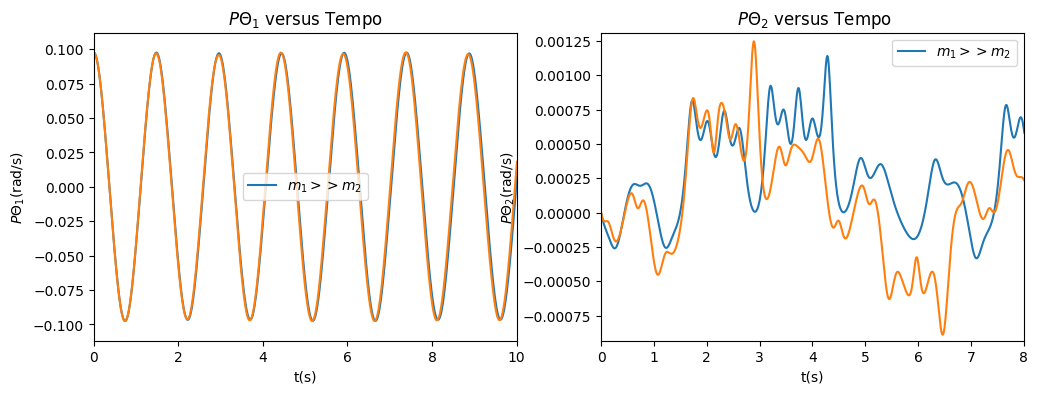

In [1]:
"""
Created on Tue Mar 26 21:32:32 2024

@author: Celso
"""

import numpy as np;
import matplotlib.pyplot as plt

m1=0.100; # in kg
m2=0.001; # in kg
l1=0.5; # in m
l2=0.2; # in m
h=0.01; # in s
Tf=10000
theta10=0; # in rad
p10=0.09752 # in kg m^2/s
theta20=1.5708; # in rad
p20=0; # in kg m^2/s
g = 10


#derivada dtheta em dt
def dtheta_dt(ptheta,pthet,l,m,theta10,theta20):
  return ptheta/(m*l**2) - pthet*np.cos(theta10 - theta20)/(m1*l1*l2)

#derivada de p theta em dt para corpo1
def dptheta_dt(theta,l,m,theta10,theta20,p10,p20):
  return -m*g*l*np.sin(theta) - p10*p20*np.sin(theta10-theta20)/(m1*l1*l2)

#derivada de p theta em dt para corpo2
def dptheta_dt2(theta,l,m,theta10,theta20,p10,p20):
  return -m*g*l*np.sin(theta) + p10*p20*np.sin(theta10-theta20)/(m1*l1*l2)


# Derivadas para pendulo duplo diferente de m1>> m2
# Derivada de dtheta em dt
def dtheta_dt1(p1, p2, l1, l2, m1, m2, theta10, theta20):
    return (l2 * p1 - l1 * p2 * np.cos(theta10 - theta20)) / ((l2 * l1 ** 2) * (m1 + m2 * np.sin(theta10 - theta20)**2))


def dtheta_dt2(p1, p2, l1, l2, m1, m2, theta10, theta20):
    return (-l2 * p1 * np.cos(theta10 - theta20) + l1 * (1 + m1 / m2) * p2) / ((l1 * l2**2) * (m1 + m2 * np.sin(theta10 - theta20)**2))


# Derivada de p theta em dt para corpo1
def dptheta_dt1(p1, p2, l1, l2, m1, m2, theta10, theta20, A, B):
    return -(m1 + m2) * g * l1 * np.sin(theta10) - A + B


# Derivada de p theta em dt para corpo2
def dptheta_dt2c(p1, p2, l1, l2, m1, m2, theta10, theta20, A, B):
    return -m2 * g * l2 * np.sin(theta20) + A - B

def f_A(p10, p20, l1, l2, m1, m2, theta10, theta20):
    return p10 * p20 * np.sin(theta10 - theta20) / (l1 * l2 * (m1 + m2*np.sin(theta10 - theta20)**2))

def f_B(p10, p20, l1, l2, m1, m2, theta10, theta20):
    return ((l2 ** 2) * m2 * (p10**2) + (l1**2)*(m1 + m2)*(p20**2) - l1 * l2 * m2 * p10 * p20 * np.cos(
        theta10 - theta20)) * np.sin(2*(theta10 -  theta20)) / (
                2 * (l1 ** 2) * (l2 ** 2) * (m1 + m2 * np.sin(theta10 - theta20)**2) ** 2)

def rk2(theta10, theta20, p10, p20, h, m1, m2, l1, l2, g, t):
    # K1 corpo 1
    k_theta11 = h * dtheta_dt(p10,p20,l1,m1,theta10,theta20)
    k_p_theta11 = h * dptheta_dt(theta10,l1,m1,theta10,theta20,p10,p20)
    #K1 corpo 2
    k_theta12 = h * dtheta_dt(p20,p10,l2,m2,theta10,theta20)
    k_p_theta12 = h * dptheta_dt2(theta20,l2,m2,theta10,theta20,p10,p20)

    #Passo intermediario corpo 1
    theta_1_21 = theta10 + 0.5 * k_theta11
    p_theta_1_21 = p10 + 0.5 * k_p_theta11
    #Passo intermediario corpo 2
    theta_1_22 = theta20 + 0.5 * k_theta12
    p_theta_1_22 = p20 + 0.5 * k_p_theta12

    #K2 corpo 1
    k_theta21 = h * dtheta_dt(p_theta_1_21,p_theta_1_22,l1,m1,theta_1_21,theta_1_22)
    k_p_theta21 = h * dptheta_dt(theta_1_21,l1,m1,theta_1_21,theta_1_22,p_theta_1_21,p_theta_1_22)
    #K2 corpo 2
    k_theta22 = h * dtheta_dt(p_theta_1_22,p_theta_1_21,l2,m2,theta_1_21,theta_1_22)
    k_p_theta22 = h * dptheta_dt2(theta_1_22,l2,m2,theta_1_21,theta_1_22,p_theta_1_21,p_theta_1_22)

    #new_theta corpo 1
    new_theta1 = theta10 + k_theta21
    new_p_theta1 = p10 + k_p_theta21
    #new_theta corpo 2
    new_theta2 = theta20 + k_theta22
    new_p_theta2 = p20 + k_p_theta22

    # Validação new_theta
    if new_theta1 > np.pi:new_theta1 -= 2 * np.pi
    elif new_theta1 < -np.pi:new_theta1 += 2 * np.pi
    elif new_theta2 > np.pi:new_theta2 -= 2 * np.pi
    elif new_theta2 < -np.pi:new_theta2 += 2 * np.pi

    return new_theta1, new_theta2, new_p_theta1, new_p_theta2

def rk2_hamilt(theta10, theta20, p10, p20, h, m1, m2, l1, l2, g, t):
    A = f_A(p10, p20, l1, l2, m1, m2, theta10, theta20)
    B = f_B(p10, p20, l1, l2, m1, m2, theta10, theta20)
    # K1 corpo 1
    k_theta11 = h * dtheta_dt1(p10, p20, l1, l2, m1, m2, theta10, theta20)
    k_p_theta11 = h * dptheta_dt1(p10, p20, l1, l2, m1, m2, theta10, theta20, A, B)
    # K1 corpo 2
    k_theta12 = h * dtheta_dt2(p10, p20, l1, l2, m1, m2, theta10, theta20)
    k_p_theta12 = h * dptheta_dt2c(p10, p20, l1, l2, m1, m2, theta10, theta20, A, B)

    # Passo intermediario corpo 1
    theta_1_21 = theta10 + 0.5 * k_theta11
    p_theta_1_21 = p10 + 0.5 * k_p_theta11
    # Passo intermediario corpo 2
    theta_1_22 = theta20 + 0.5 * k_theta12
    p_theta_1_22 = p20 + 0.5 * k_p_theta12

    A_12 = f_A(p_theta_1_21, p_theta_1_22, l1, l2, m1, m2, theta_1_21, theta_1_22)
    B_12 = f_B(p_theta_1_21, p_theta_1_22, l1, l2, m1, m2, theta_1_21, theta_1_22)

    # K2 corpo 1
    k_theta21 = h * dtheta_dt1(p_theta_1_21, p_theta_1_22, l1, l2, m1, m2, theta_1_21, theta_1_22)
    k_p_theta21 = h * dptheta_dt1(p_theta_1_21, p_theta_1_22, l1, l2, m1, m2, theta_1_21, theta_1_22, A_12, B_12)
    # K2 corpo 2
    k_theta22 = h * dtheta_dt2(p_theta_1_21, p_theta_1_22, l1, l2, m1, m2, theta_1_21, theta_1_22)
    k_p_theta22 = h * dptheta_dt2c(p_theta_1_21, p_theta_1_22, l1, l2, m1, m2, theta_1_21, theta_1_22, A_12, B_12)

    # new_theta corpo 1
    new_theta1 = theta10 + k_theta21
    new_p_theta1 = p10 + k_p_theta21
    # new_theta corpo 2
    new_theta2 = theta20 + k_theta22
    new_p_theta2 = p20 + k_p_theta22

    # Validação new_theta
    if new_theta1 > np.pi:
        new_theta1 -= 2 * np.pi
    elif new_theta1 < -np.pi:
        new_theta1 += 2 * np.pi
    elif new_theta2 > np.pi:
        new_theta2 -= 2 * np.pi
    elif new_theta2 < -np.pi:
        new_theta2 += 2 * np.pi

    return new_theta1, new_theta2, new_p_theta1, new_p_theta2

t = np.arange(0, Tf+h, h)
Nt = len(t)

# Inicializa os vetores para armazenar as soluções
array = np.zeros((4,Nt))
array[0][0],array[1][0],array[2][0],array[3][0] = theta10,theta20,p10,p20

# Inicializa os vetores para armazenar as soluções diferentes de m1>>m2
arrayc = np.zeros((4, Nt))
arrayc[0][0], arrayc[1][0], arrayc[2][0], arrayc[3][0] = theta10, theta20, p10, p20


Theta1Sec,Ptheta1Sec = [],[]
Theta1Secc,Ptheta1Secc = [],[]

# Loop preenchendo array com valores de rk2
for i in range(1, Nt):
    array[0][i], array[1][i],array[2][i],array[3][i] = rk2(array[0][i-1], array[1][i-1], array[2][i-1],array[3][i-1],h, m1, m2, l1, l2, g, t[i-1])
    arrayc[0][i], arrayc[1][i], arrayc[2][i], arrayc[3][i] = rk2_hamilt(arrayc[0][i - 1], arrayc[1][i - 1], arrayc[2][i - 1], arrayc[3][i - 1], h, m1, m2, l1, l2, g, t[i - 1])

    # Verifica se θ2 passou de negativo para positivo caso m1>>m2
    if array[1][i] > 0 and array[1][i-1] < 0:
        Theta1Sec.append(array[0][i])
        Ptheta1Sec.append(array[2][i])
    # Verifica se θ2 passou de negativo para positivo
    elif arrayc[1][i] > 0 and arrayc[1][i-1] < 0:
        Theta1Secc.append(arrayc[0][i])
        Ptheta1Secc.append(arrayc[2][i])


#definido array para output
theta1t, p1t, theta2t, p2t = array[0], array[2] , array[1], array[3]

theta1tc, p1tc, theta2tc, p2tc = arrayc[0], arrayc[2] , arrayc[1], arrayc[3]


data = np.vstack((theta1t, p1t, theta2t, p2t)).T
data_poncare = np.vstack((Theta1Sec, Ptheta1Sec)).T

datac = np.vstack((theta1tc, p1tc, theta2tc, p2tc)).T
data_poncarec = np.vstack((Theta1Secc, Ptheta1Secc)).T

plt.figure(figsize = (6,4))
plt.scatter(np.array(Theta1Sec)/np.pi, Ptheta1Sec, s=2)
plt.xlabel('θ1/π')
plt.ylabel('pθ1')
plt.title('Seção de Poincaré')
plt.show()

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(t, theta1t)
plt.xlim(0,10)
plt.xlabel('t(s)')
plt.ylabel('$ \Theta_1$(rad)')
plt.title('posição $\Theta_1$ versus Tempo')
plt.subplot(1,2,2)
plt.plot(t, theta2t)
plt.xlim(0,10)
plt.xlabel('t(s)')
plt.ylabel('$ \Theta_2$(rad)')
plt.title('posição $\Theta_2$ versus Tempo')

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(t, p1t)
plt.xlim(0,10)
plt.xlabel('t(s)')
plt.ylabel('$ P \Theta_1$(rad/s)')
plt.title('$P \Theta_1$ versus Tempo')

plt.subplot(1,2,2)
plt.plot(t, p2t)
plt.xlim(0,10)
y_lim = len(t[t<=10])
plt.ylim(min(p2t[:y_lim]) + min(p2t[:y_lim])*0.05, max(p2t[:y_lim]) + max(p2t[:y_lim])*0.05)
plt.xlabel('t(s)')
plt.ylabel('$ P \Theta_2$(rad/s)')
plt.title(' $P \Theta_2$ versus Tempo')


# Comparativos gráficos

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.scatter(np.array(Theta1Sec)/np.pi, Ptheta1Sec, s=2)
plt.xlabel('θ1/π')
plt.ylabel('pθ1')
plt.title('Seção de Poincaré m1>>m2')
plt.subplot(1,2,2)
plt.scatter(np.array(Theta1Secc)/np.pi, Ptheta1Secc, s=2)
plt.xlabel('θ1/π')
plt.ylabel('pθ1')
plt.title('Seção de Poincaré')
plt.show()

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(t, theta1t, label = '$m_1 >> m_2$')
plt.plot(t, theta1tc)
plt.xlim(0,10)
plt.xlabel('t(s)')
plt.ylabel('$ \Theta_1$(rad)')
plt.legend()
plt.title('posição $\Theta_1$ versus Tempo')
plt.subplot(1,2,2)
plt.plot(t, theta2t, label = '$m_1 >> m_2$')
plt.plot(t, theta2tc)
plt.xlim(0,5)
plt.xlabel('t(s)')
plt.ylabel('$ \Theta_2$(rad)')
plt.legend()
plt.title('posição $\Theta_2$ versus Tempo')

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(t, p1t, label = '$m_1 >> m_2$')
plt.plot(t, p1tc)
plt.xlim(0,10)
plt.xlabel('t(s)')
plt.ylabel('$ P \Theta_1$(rad/s)')
plt.legend()
plt.title('$P \Theta_1$ versus Tempo')
plt.subplot(1,2,2)
plt.plot(t, p2t, label = '$m_1 >> m_2$')
plt.plot(t,p2tc)
plt.xlim(0,8)
y_lim = len(t[t<=8])
plt.ylim(min(p2tc[:y_lim]) + min(p2tc[:y_lim])*0.05, max(p2tc[:y_lim])+ max(p2tc[:y_lim])*0.05)
plt.xlabel('t(s)')
plt.ylabel('$ P \Theta_2$(rad/s)')
plt.legend()
plt.title(' $P \Theta_2$ versus Tempo')

# Salvar os dados de m1>>m2  descomente as linhas abaixo.

#np.savetxt('dados_simulados.txt', data, header='Theta1t P1t Theta2t P2t', delimiter='\t', fmt='%.6f', comments='')
#np.savetxt('dados_poncare.txt', data_poncare, header='Theta1Sec Ptheta1Sec', delimiter='\t', fmt='%.6f', comments='')

# Salvar os dados em que m1 não é muito maior que m2 descomente as linhas abaixo.

#np.savetxt('dados_simuladosc.txt', data, header='Theta1t P1t Theta2t P2t', delimiter='\t', fmt='%.6f', comments='')
#np.savetxt('dados_poncarec.txt', data_poncare, header='Theta1Sec Ptheta1Sec', delimiter='\t', fmt='%.6f', comments='')
